## Data Visualization

In this notebook, we explore the BRFSS state data with a variety of data visualizations.

In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem

In [10]:
# Load data exported after cleaning
data_cleaning_path = "data_cleaning.csv"

data_cleaning_df = pd.read_csv(data_cleaning_path)


In [11]:
# Create a new column that adds the percent of people per state who have had no work for over and less than a year
data_cleaning_df["% Unemployed"] = data_cleaning_df["No work >yr"] + data_cleaning_df["No work< yr"]
data_cleaning_df.head()

,State,"$15,000 - 24,999","$25,000 - 34,999","$35,000 - 49,999","$50,000+",1-13 days when mental health not good,1-13 days when physical health not good,14+ days when mental health not good,14+ days when physical health not good,18-24 years,...,Student,Unable to work,"White, non-Hispanic",Widowed,Depression Diagnosis,Zero days when mental health not good,Zero days when physical health not good,State Code,GeoLocation,% Unemployed
0,Alabama,20.0,10.4,14.6,42.9,24.5,23.4,17.5,16.0,12.2,...,4.9,13.7,67.5,8.0,52.725,58.0,60.6,AL,"(32.84057112200048, -86.63186076199969)",5.2
1,Alaska,12.3,8.9,12.5,60.4,24.8,29.0,12.0,9.8,12.8,...,3.9,5.6,63.6,4.6,52.325,63.1,61.2,AK,"(64.84507995700051, -147.72205903599973)",5.2
2,All States and DC (median) **,14.9,9.8,13.8,52.7,25.0,24.6,13.8,12.6,12.4,...,5.1,6.3,73.3,6.8,51.925,61.4,63.1,UW,NaN,4.8
3,"All States, DC and Territories (median) **",15.0,9.8,13.8,52.5,24.9,24.6,13.8,12.6,12.4,...,5.1,6.3,71.9,6.8,51.925,61.4,63.0,US,NaN,4.8
4,Arizona,17.8,10.9,14.5,48.1,25.6,25.6,14.4,13.2,12.5,...,5.3,6.2,58.4,6.8,49.325,60.0,61.2,AZ,"(34.865970280000454, -111.76381127699972)",5.2


In [12]:
data_cleaning_df.columns

Index(['State', '$15,000 - 24,999', '$25,000 - 34,999', '$35,000 -  49,999',
       '$50,000+', '1-13 days when mental health not good',
       '1-13 days when physical health not good',
       '14+ days when mental health not good',
       '14+ days when physical health not good', '18-24 years', '25-34 years',
       '35-44 years', '45-54 years', '55-64 years', '65+ years',
       'American Indian or Alaskan native, non-Hispanic',
       'Asian, non-Hispanic', 'Black, non-Hispanic', 'College+', 'Divorced',
       'Employed', 'Female', 'H.S. or G.E.D.', 'Hispanic', 'Homemaker',
       'Less than $15,000', 'Less than H.S.', 'Male', 'Married',
       'Multiracial, non-Hispanic',
       'Native Hawaiian or other Pacific Islander, non-Hispanic',
       'Never married', 'No Depression Diagnosis', 'No work >yr',
       'No work< yr', 'Other race, non-Hispanic', 'Partnered', 'Retired',
       'Self-employed', 'Separated', 'Some post-H.S.', 'Student',
       'Unable to work', 'White, non-Hispa

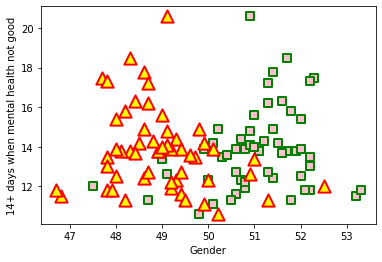

In [8]:
x_female=data_cleaning_df["Female"]
x_male=data_cleaning_df["Male"]
y=data_cleaning_df["14+ days when mental health not good"].astype(float)
plt.scatter(x_female, y, c ="pink", linewidths = 2, marker ="s", edgecolor ="green", s = 50)
plt.scatter(x_male, y, c ="yellow",linewidths = 2,marker ="^", edgecolor ="red", s = 150)
plt.xlabel("Gender")
plt.ylabel("14+ days when mental health not good")
plt.show()

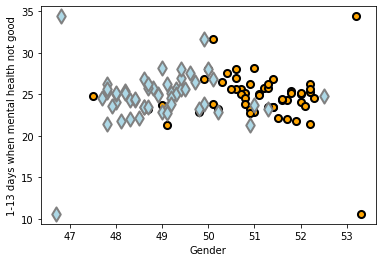

In [9]:
x_female=data_cleaning_df["Female"]
x_male=data_cleaning_df["Male"]
y=data_cleaning_df["1-13 days when mental health not good"].astype(float)
plt.scatter(x_female, y, c ="orange", linewidths = 2, marker ="o", edgecolor ="black", s = 50)
plt.scatter(x_male, y, c ="lightblue",linewidths = 2,marker ="d", edgecolor ="grey", s = 100)
plt.xlabel("Gender")
plt.ylabel("1-13 days when mental health not good")
plt.show()

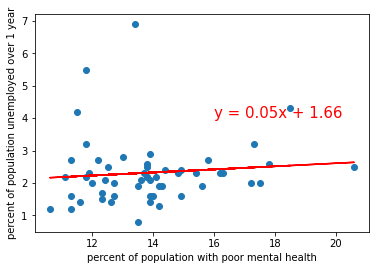

In [10]:
x=data_cleaning_df["14+ days when mental health not good"].astype(float)
y=data_cleaning_df["No work >yr"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(16,4),fontsize=15,color="red")
plt.xlabel("percent of population with poor mental health")
plt.ylabel("percent of population unemployed over 1 year")
plt.show()

In [11]:
correlation = st.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.1


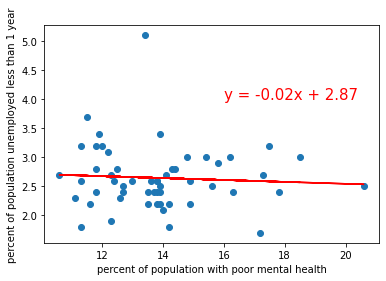

In [12]:
x=data_cleaning_df["14+ days when mental health not good"].astype(float)
y1=data_cleaning_df["No work< yr"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y1)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y1)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(16,4),fontsize=15,color="red")
plt.xlabel("percent of population with poor mental health")
plt.ylabel("percent of population unemployed less than 1 year")
plt.show()

In [13]:
correlation_1 = st.pearsonr(x,y1)
print(f"The correlation between both factors is {round(correlation_1[0],2)}")

The correlation between both factors is -0.06


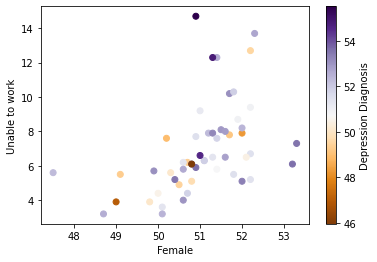

In [14]:
plt.scatter(data_cleaning_df['Female'],data_cleaning_df['Unable to work'],c=data_cleaning_df['Depression Diagnosis'], cmap="PuOr")
clb = plt.colorbar()
plt.xlabel("Female")
plt.ylabel("Unable to work")
clb.set_label("Depression Diagnosis")
plt.show()

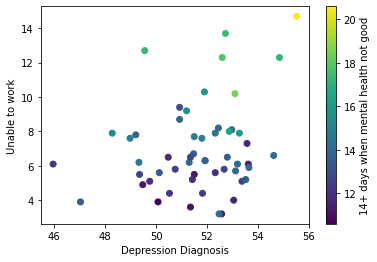

In [15]:
plt.scatter(data_cleaning_df['Depression Diagnosis'],data_cleaning_df['Unable to work'],c=data_cleaning_df['14+ days when mental health not good'])
clb = plt.colorbar()
plt.xlabel('Depression Diagnosis')
plt.ylabel('Unable to work')
clb.set_label('14+ days when mental health not good')
plt.show()

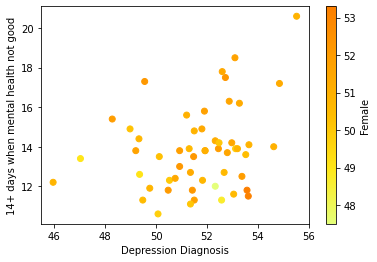

0.08783433425960248


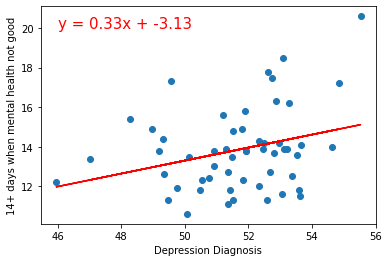

In [27]:
plt.scatter(data_cleaning_df['Depression Diagnosis'],data_cleaning_df['14+ days when mental health not good'],c=data_cleaning_df["Female"],cmap='Wistia')
clb = plt.colorbar()
plt.xlabel('Depression Diagnosis')
plt.ylabel('14+ days when mental health not good')
clb.set_label("Female")
plt.show()

x=data_cleaning_df['Depression Diagnosis'].astype(float)
y=data_cleaning_df['14+ days when mental health not good'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
rsqd = rvalue**2
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(46,20),fontsize=15,color="red")
plt.xlabel('Depression Diagnosis')
plt.ylabel('14+ days when mental health not good')
print(rsqd)
plt.show()

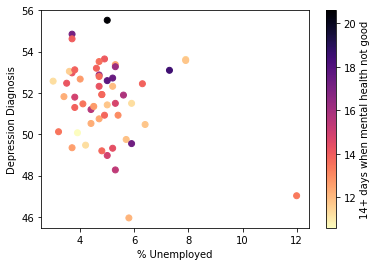

0.06083558670611899


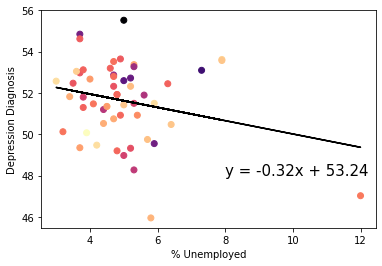

In [29]:
plt.scatter(data_cleaning_df['% Unemployed'],data_cleaning_df['Depression Diagnosis'],c=data_cleaning_df['14+ days when mental health not good'],cmap='magma_r')
clb = plt.colorbar()
plt.xlabel('% Unemployed')
plt.ylabel('Depression Diagnosis')
clb.set_label('14+ days when mental health not good')
plt.show()

x=data_cleaning_df['% Unemployed'].astype(float)
y=data_cleaning_df['Depression Diagnosis'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
rsqd = rvalue**2
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, c=data_cleaning_df['14+ days when mental health not good'],cmap='magma_r')
plt.plot(x,regress_values,"black")
plt.annotate(line_eq,(8,48),fontsize=15,color="black")
plt.xlabel('% Unemployed')
plt.ylabel('Depression Diagnosis')
print(rsqd)
plt.show()

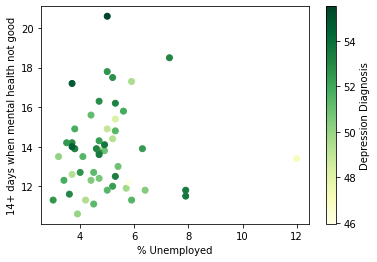

0.002011540918830352


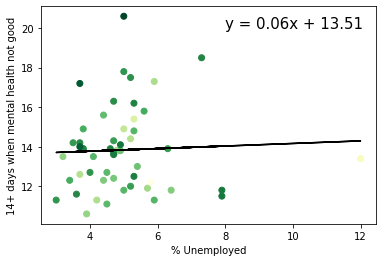

In [30]:
plt.scatter(data_cleaning_df['% Unemployed'],data_cleaning_df['14+ days when mental health not good'],c=data_cleaning_df['Depression Diagnosis'],cmap='YlGn')
clb = plt.colorbar()
plt.xlabel('% Unemployed')
plt.ylabel('14+ days when mental health not good')
clb.set_label('Depression Diagnosis')
plt.show()

x=data_cleaning_df['% Unemployed'].astype(float)
y=data_cleaning_df['14+ days when mental health not good'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
rsqd = rvalue**2
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, c=data_cleaning_df['Depression Diagnosis'],cmap='YlGn')
plt.plot(x,regress_values,"black")
plt.annotate(line_eq,(8,20),fontsize=15,color="black")
plt.xlabel('% Unemployed')
plt.ylabel('14+ days when mental health not good')
print(rsqd)
plt.show()

0.007778471298359115


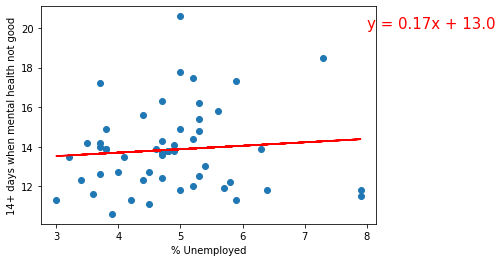

In [19]:
df = data_cleaning_df.loc[data_cleaning_df['% Unemployed'] < 11]

x=df['% Unemployed'].astype(float)
y=df['14+ days when mental health not good'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
rsqd = rvalue**2
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(8,20),fontsize=15,color="red")
plt.xlabel('% Unemployed')
plt.ylabel('14+ days when mental health not good')
print(rsqd)
plt.show()

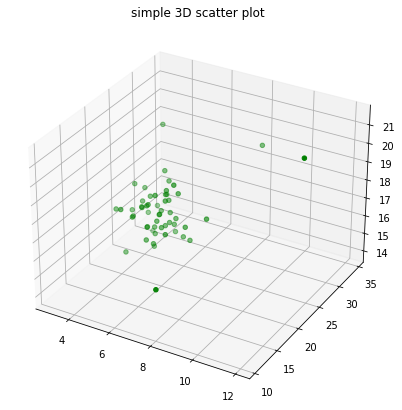

In [20]:
z = data_cleaning_df['35-44 years']
x = data_cleaning_df['% Unemployed']
y = data_cleaning_df['1-13 days when mental health not good']
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

Text(0.5, 0.92, '% Unemployed vs. 14+ days when mental health not good at the age of 35-44 years old ')

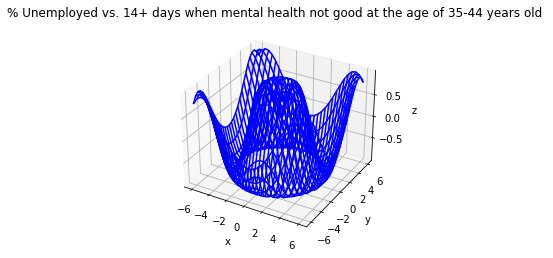

In [21]:
z = data_cleaning_df['35-44 years']
x = data_cleaning_df['% Unemployed']
y = data_cleaning_df['14+ days when mental health not good']
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('% Unemployed vs. 14+ days when mental health not good at the age of 35-44 years old ')


In [22]:
percent_unemployed = data_cleaning_df.groupby('State Code')
count = percent_unemployed["% Unemployed"].sum()
over_14day_group = data_cleaning_df.groupby('State Code')
counts = over_14day_group["14+ days when mental health not good"].sum()
less_14day_group = data_cleaning_df.groupby('State Code')
counts2 = less_14day_group["1-13 days when mental health not good"].sum()
combine = pd.merge(count, counts, on='State Code')
combine2=pd.merge(combine,counts2,on='State Code')
combine2.head()

,% Unemployed,14+ days when mental health not good,1-13 days when mental health not good
State Code,,,
AK,5.2,12.0,24.8
AL,5.2,17.5,24.5
AR,5.0,17.8,23.5
AZ,5.2,14.4,25.6
CA,5.7,11.9,25.2


<AxesSubplot:xlabel='State Code'>

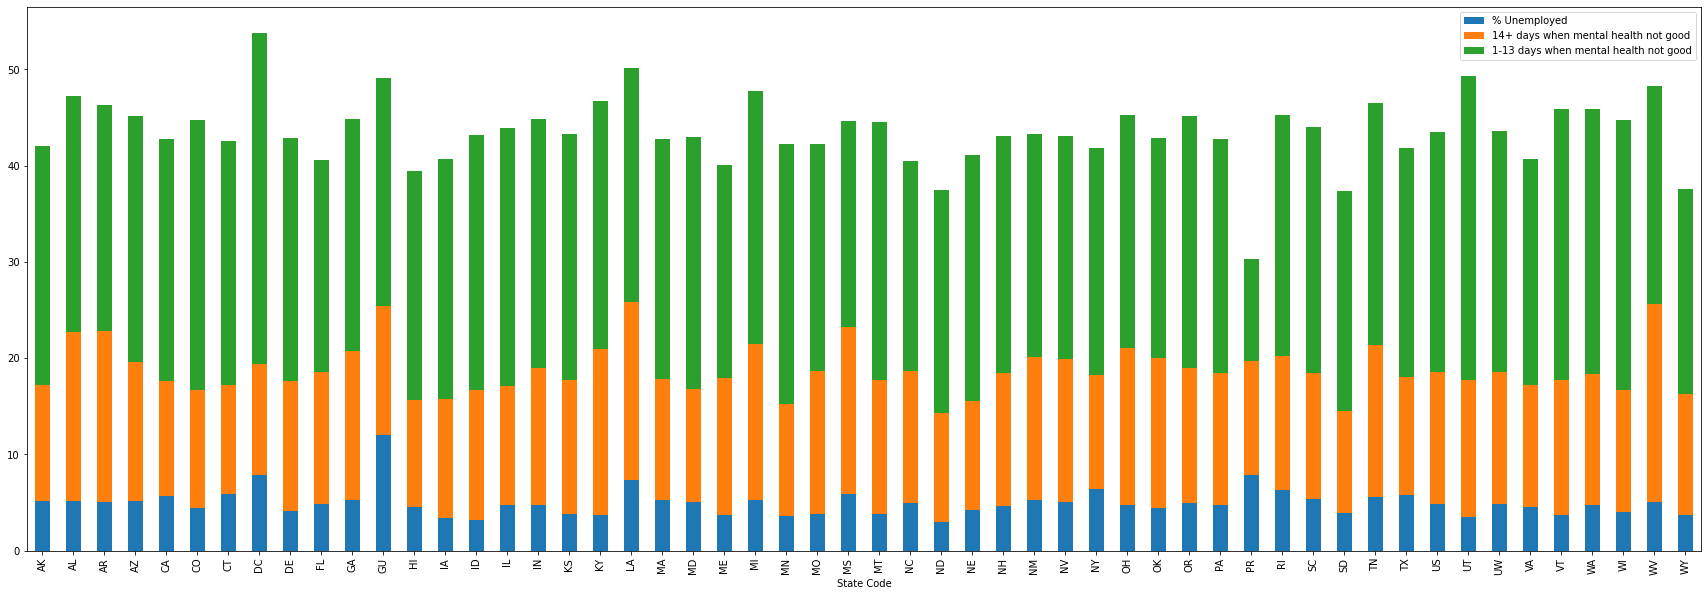

In [23]:
combine2.plot(kind='bar', stacked=True, figsize=[30,10] )